In [157]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV directly from local folder
# Make sure the file is in the same folder as the notebook
df = pd.read_csv("coffe_sales.csv")
# Preview the data
print(df.head())
print(df.info())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----

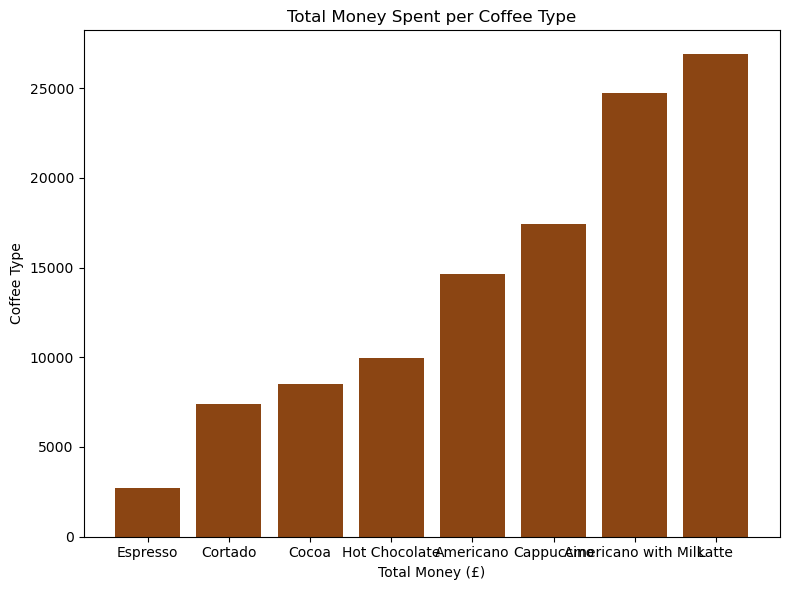

In [155]:
# Visualization 1: Total Money Spent per Coffee Type

sales_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values()

plt.figure(figsize=(8,6))
plt.bar(sales_by_coffee.index, sales_by_coffee.values, color='saddlebrown')
plt.xlabel('Total Money (£)')
plt.ylabel('Coffee Type')
plt.title('Total Money Spent per Coffee Type')
plt.tight_layout()
plt.show()

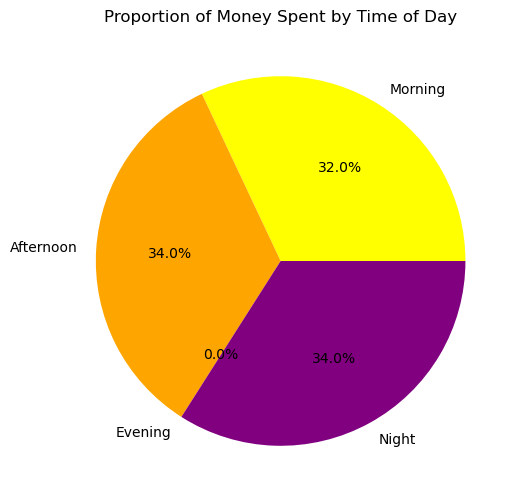

In [153]:
# Visualization 2: Total Money Spent by Time of Day

plt.figure(figsize=(6,6))
plt.pie(money_by_time.values, labels=money_by_time.index, autopct='%1.1f%%', colors=['yellow','orange','black','purple'])
plt.title('Proportion of Money Spent by Time of Day')
plt.show()

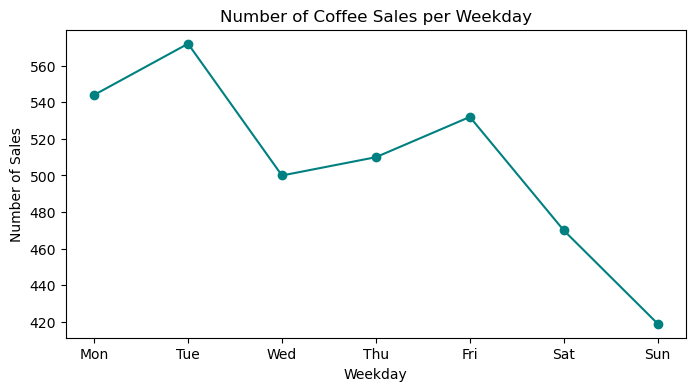

In [134]:
# Visualization 3: Number of Sales per Weekday

plt.figure(figsize=(8,4))
plt.plot(sales_by_weekday.index, sales_by_weekday.values, marker='o', linestyle='-', color='teal')
plt.xlabel('Weekday')
plt.ylabel('Number of Sales')
plt.title('Number of Coffee Sales per Weekday')
plt.show()


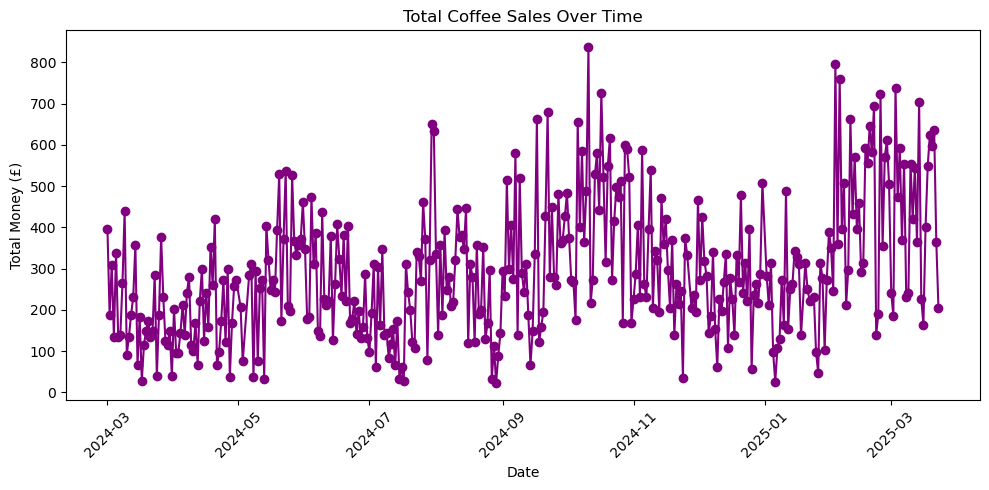

In [159]:
# Visualization 4: Total Money Spent Over Time

sales_over_time = df.groupby('Date')['money'].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Date')
plt.ylabel('Total Money (£)')
plt.title('Total Coffee Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

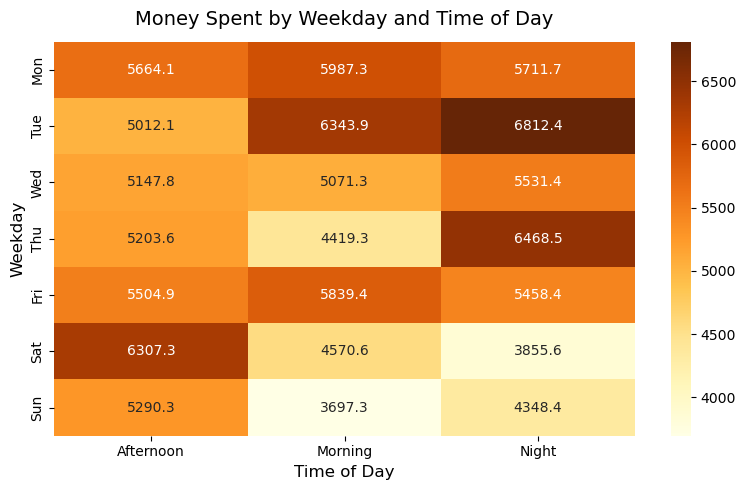

In [174]:
# Visualization 5: Heatmap of money spent by Weekday and Time_of_Day
pivot = df.pivot_table(values='money', index='Weekday', columns='Time_of_Day', aggfunc='sum').reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlOrBr', cbar=True, linewidths=0, linecolor='white')  # removed underline
plt.title('Money Spent by Weekday and Time of Day', fontsize=14, pad=12)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Weekday', fontsize=12)
plt.tight_layout()
plt.show()